In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
# get working directory
from pathlib import Path
print(Path.cwd())

C:\Users\dpapa\ANA 680_material Nov '22\WK4 FINAL


In [3]:
# or another way...
import os
cwd = os.getcwd()
print(cwd)

C:\Users\dpapa\ANA 680_material Nov '22\WK4 FINAL


In [4]:
# change working dir
os.chdir("C:\\Users\\dpapa") 

cwd = os.getcwd()
print(cwd)

C:\Users\dpapa


In [5]:
# Load the dataset. Cells with content “NULL”, “?”, or “NONE” or just blank space will be interpreted as np.NAN
df=pd.read_csv(r"C:\Users\dpapa\water_quality_dataset.csv", na_values=['NULL', '?', 'NONE'])

In [6]:
df.shape

(3276, 10)

In [7]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [8]:
columns =list(df.columns)
columns

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity',
 'Potability']

In [9]:
# look for missing values
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [10]:
# find which column has missing values
print(df.isnull().sum().sort_values(ascending=False).to_string())

Sulfate            781
ph                 491
Trihalomethanes    162
Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0


In [11]:
# impute missing values for "Bare Nuclei" feature with the MEAN
missing_col = ['Sulfate','ph','Trihalomethanes']
for i in missing_col:
    df.loc[df.loc[:,i].isnull(),i] = df.loc[:,i].mean()

In [12]:
# check if imputation was success by seeing if we still have missing values:
# find which column has missing values
print(df.isnull().sum().sort_values(ascending=False).to_string())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0


In [13]:
# general statistics for our columns/features
df.describe().transpose()

count          mean          std         min           25%  \
ph               3276.0      7.080795     1.469956    0.000000      6.277673   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          3276.0    333.775777    36.142612  129.000000    317.094638   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3276.0     66.396293    15.769881    0.738000     56.647656   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.080795      7.870050     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20927.833607  27332.762127  61227.196008  
Chloramines          7.130299      8.114887     13.127000  
Sulfate            333.775777    350.385756    481.030642  
Conductivity       421.884968    481.792304    753.342620  
Organic_carbon      14.218338     16.557652     28.300000  
Trihalomethanes     66.396293     76.666609    124.000000  
Turbidity            3.955028      4.500320      6.739000  
Potability           0.000000      1.000000      1.000000

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Potability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

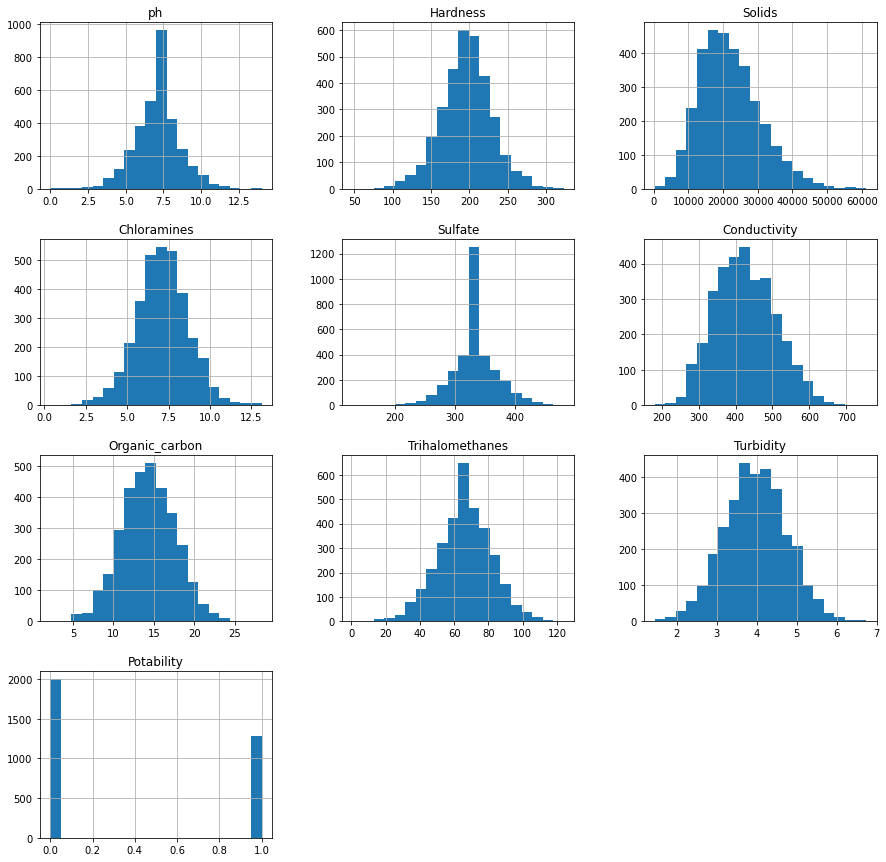

In [14]:
# histogram with specified number of bins
df.hist(bins=20, figsize=(15, 15))

In [15]:
cat_list=[]
num_list=[]

for column_name in df.columns:
    
    unique_values=len(df[column_name].unique())

        
    if unique_values<5:
        cat_list.append(column_name)
    else:
        num_list.append(column_name)

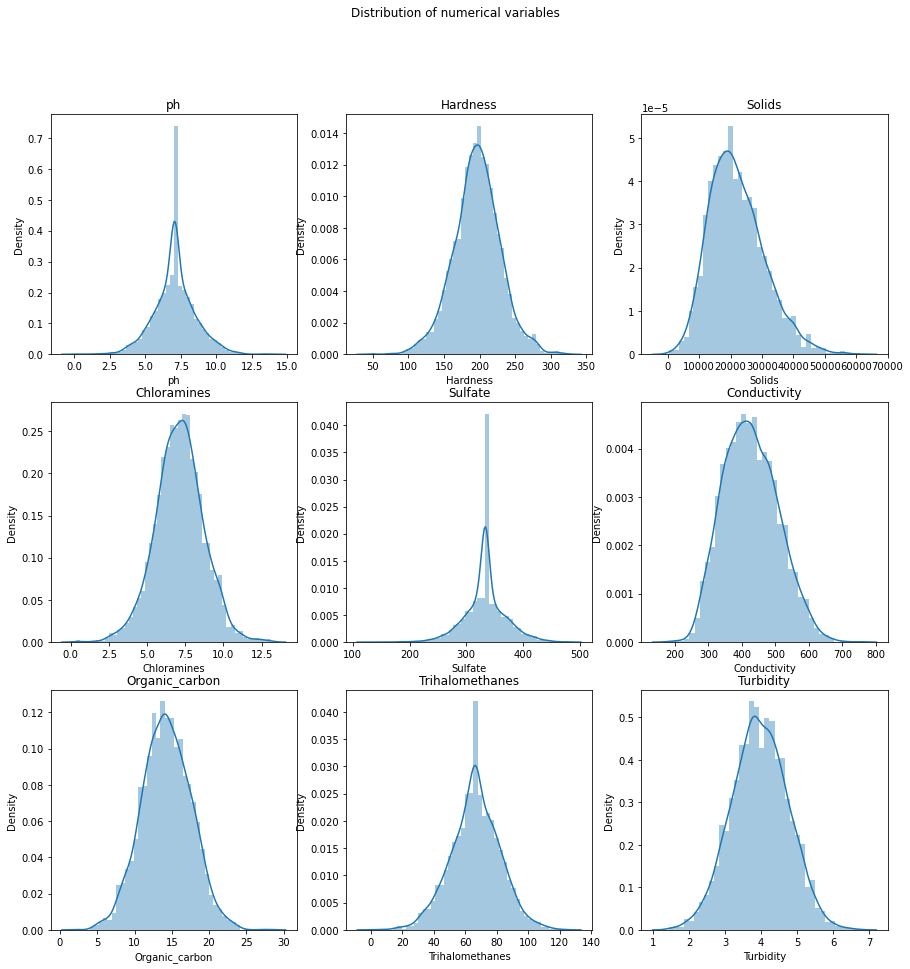

In [16]:
k=1
plt.figure(figsize=(15,15))
plt.suptitle("Distribution of numerical variables")

for i in df.loc[:,num_list]:
    plt.subplot(3,3,k)
    sns.distplot(df[i])
    plt.title(i)
    k+=1

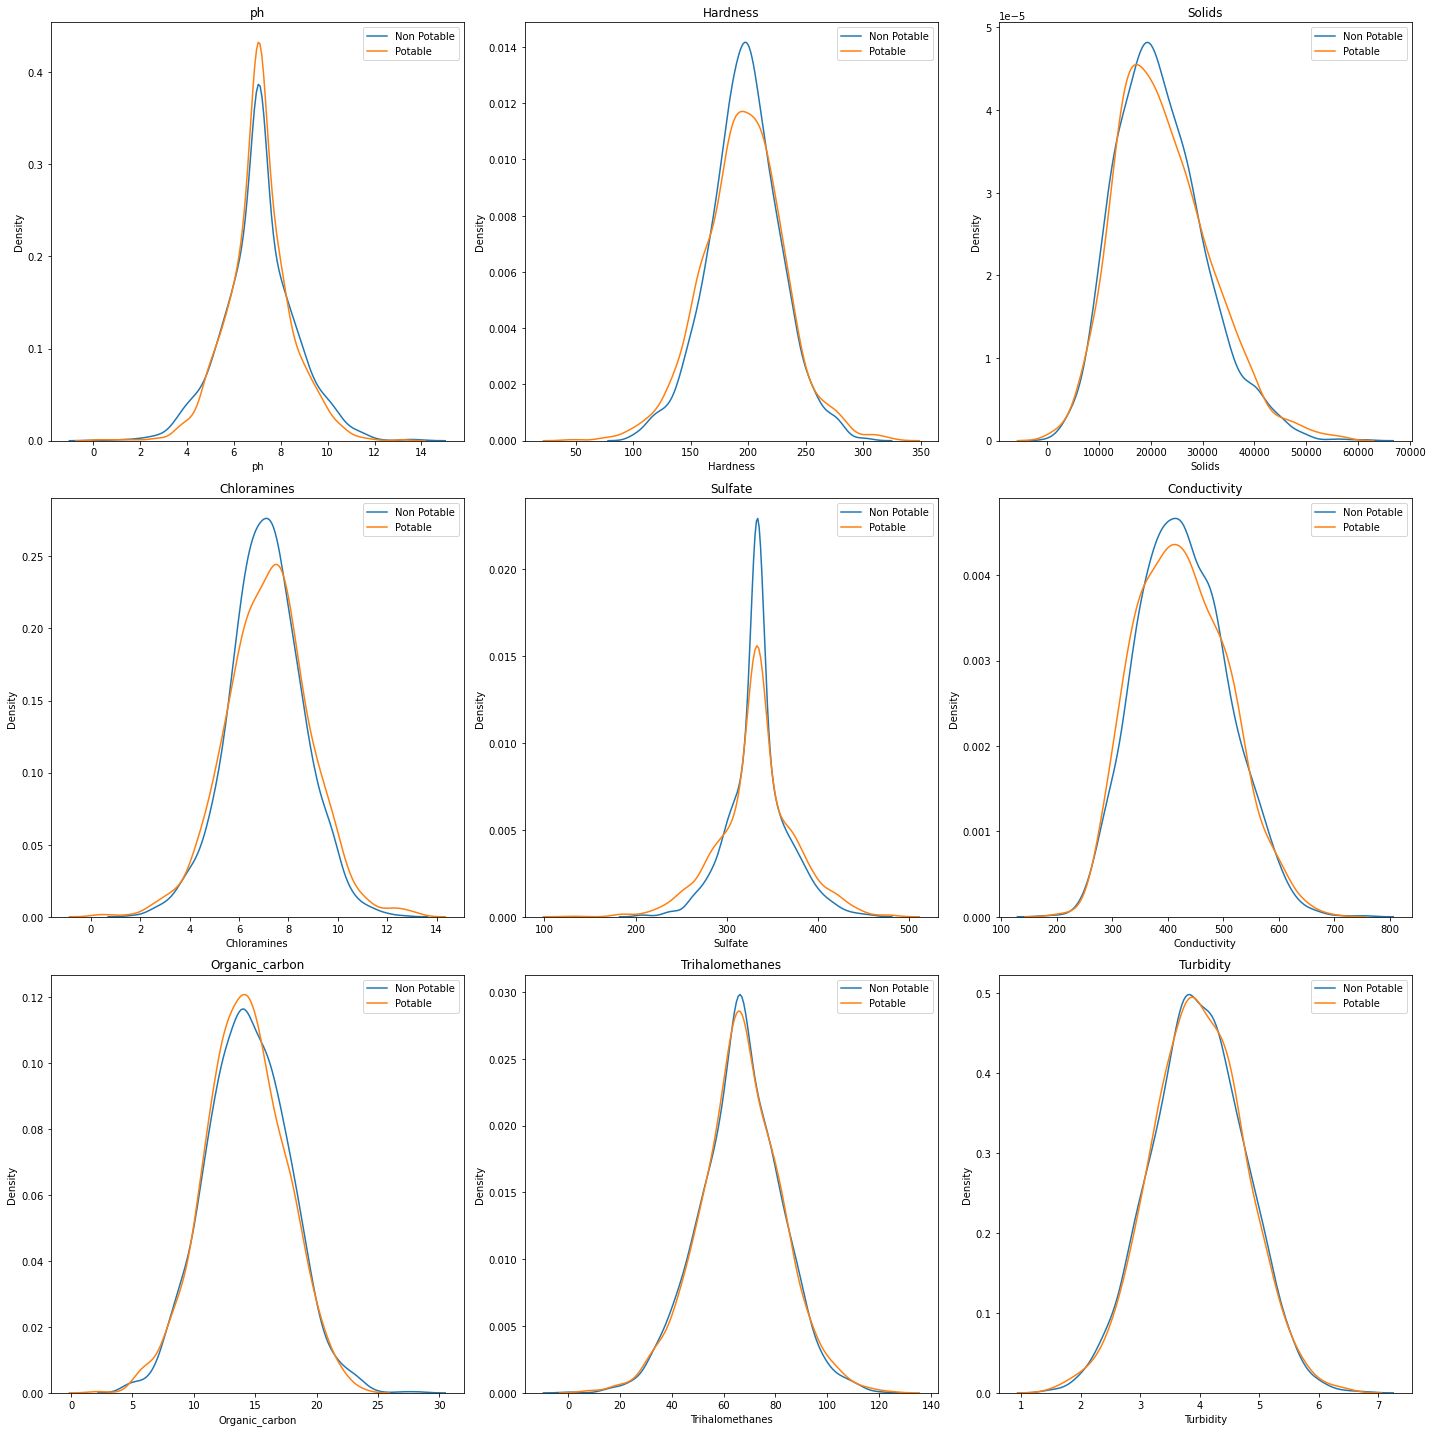

In [17]:
non_potable=df.query("Potability ==0")
potable=df.query("Potability==1")

plt.figure(figsize=(20,20))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
    plt.tight_layout()

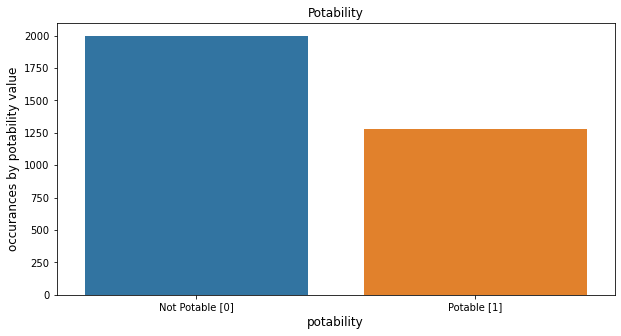

In [18]:
# distribution for "Class"
op_count = df['Potability'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=op_count.index,y= op_count.values)
plt.title('Potability')
plt.ylabel('occurances by potability value', fontsize=12)
plt.xlabel('potability', fontsize=12)
plt.xticks(ticks=[0, 1], labels = ["Not Potable [0]", "Potable [1]"])
plt.show()

In [19]:
import plotly.express as px
d = pd.DataFrame(df["Potability"].value_counts())
fig = px.pie(d, values = "Potability", names = ["Not Potable", "Potable"], hole = 0.35, opacity = 0.8,
            labels = {"label" :"Potability","Potability":"Number of Samples"})
fig.update_layout(title = dict(text = "Pie Chart of Potability Feature"))
fig.update_traces(textposition = "outside", textinfo = "percent+label")
fig.show()

<AxesSubplot:>

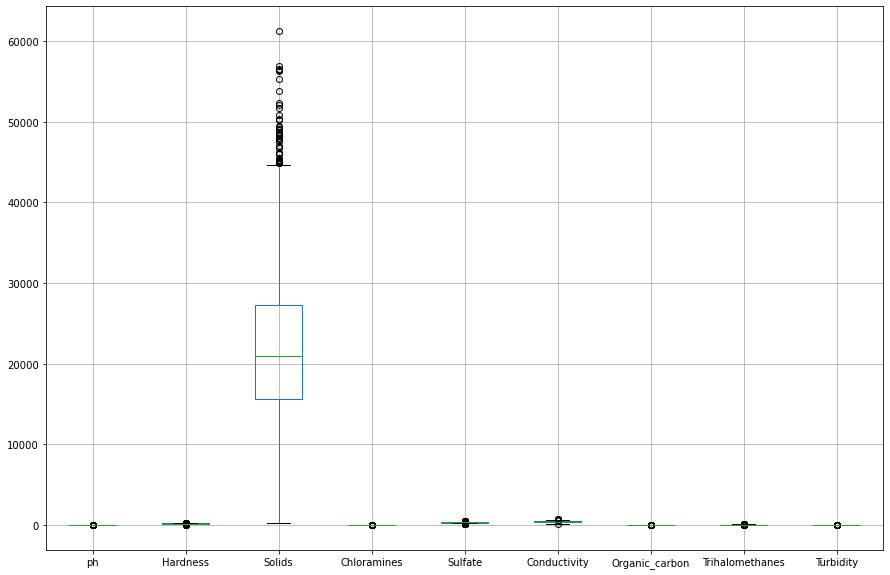

In [20]:
# generate boxplot for individual features 
df.boxplot(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'], figsize=(15, 10))

<AxesSubplot:xlabel='ph'>

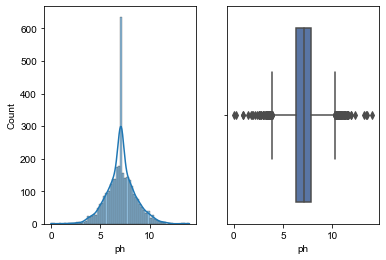

In [21]:
# Examine outliers for each variable in more detail:

#pH column
fig, axes = plt.subplots(1,2)
sns.histplot(x = df['ph'], kde = True, ax = axes[0])

#define figure size
sns.set(rc={"figure.figsize":(15, 5)}) #width=6, height=5
sns.boxplot(x = df['ph'], ax = axes[1])

<Figure size 720x720 with 0 Axes>

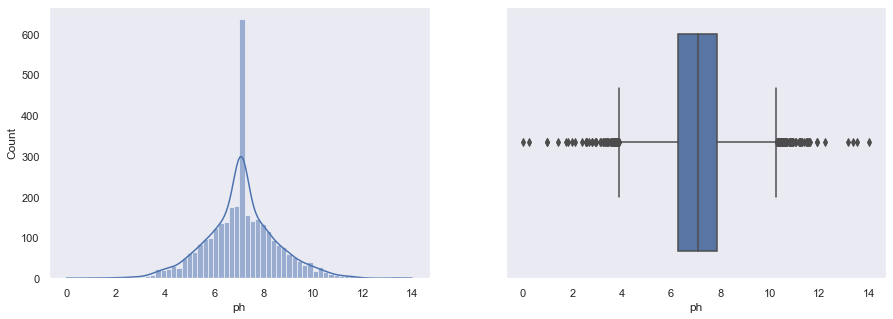

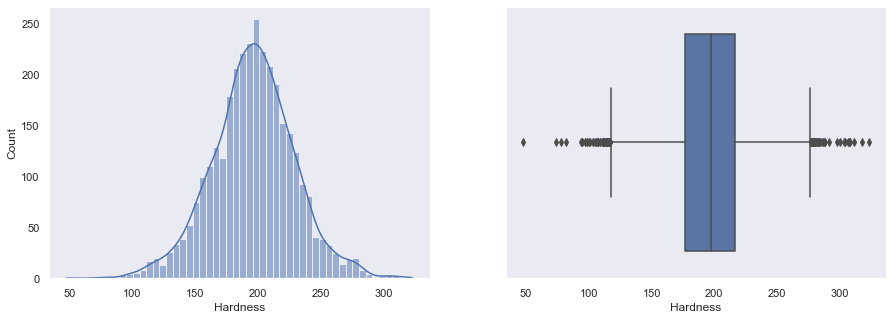

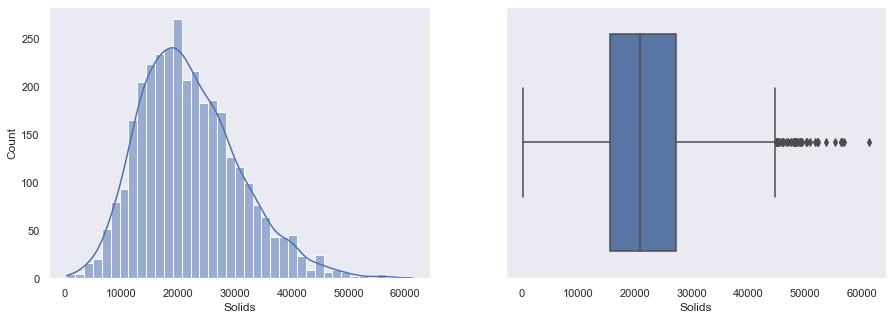

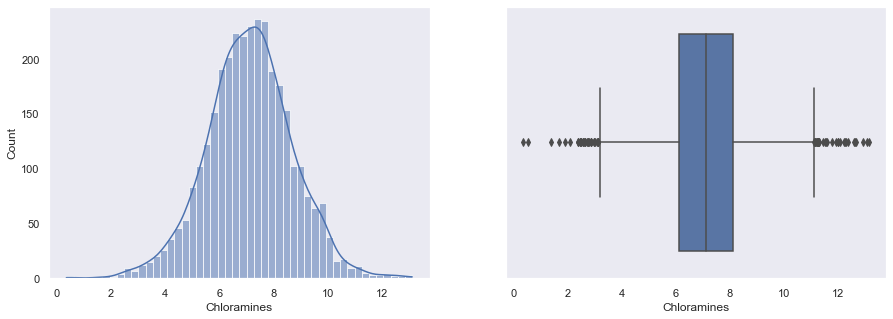

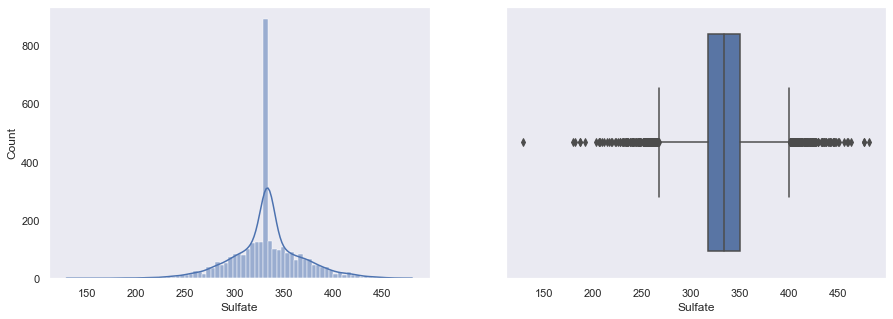

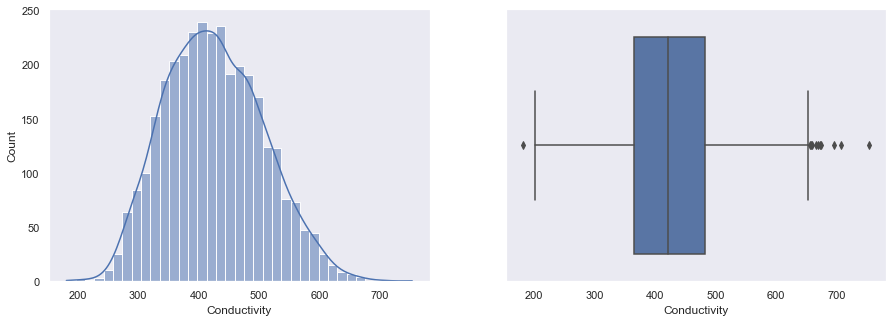

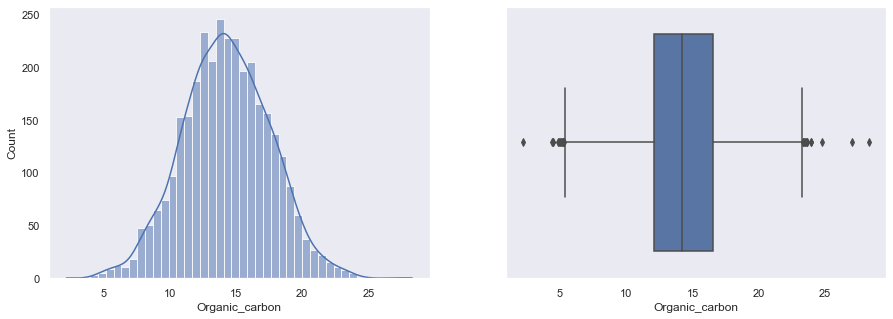

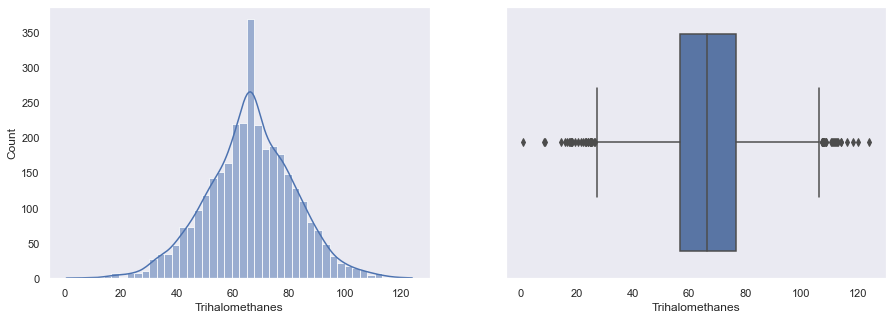

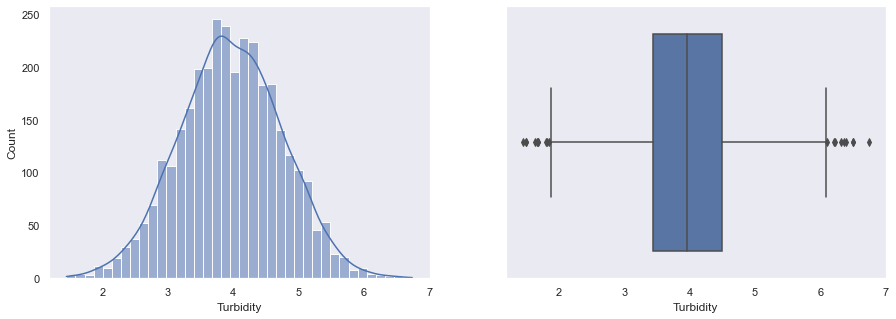

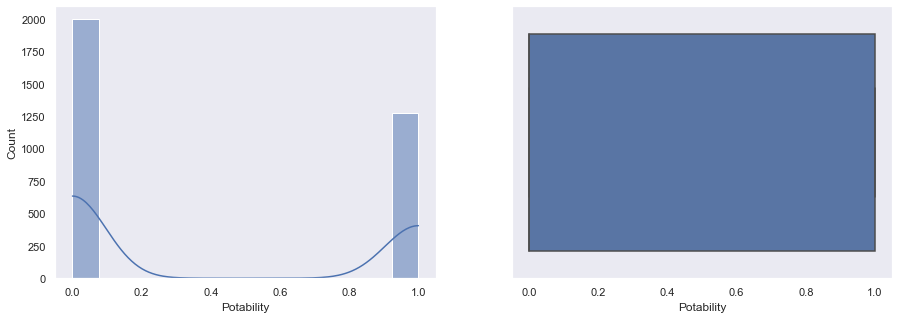

In [22]:
# lets put this into a loop for the rest of the variables:
plt.figure(figsize=(10,10))
sns.set_style('dark')
i = 1
for col in df.columns:
    fig, axes = plt.subplots(1,2)
    sns.boxplot(x=df[col])
    sns.histplot(x = df[col], kde = True, ax = axes[0])

    i+=1

In [23]:
# CLEAN OUTLIERS 

# Identify values greater than max + 1.5* Inetrquartile range and  less that min - 1.5* interquartile range
i = 1;
for col in df.columns:
    
    for x in [col]:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        df.loc[df[x] < min,x] = df[col].mean()   # df.dropna(axis=0)
        df.loc[df[x] > max,x] = df[col].mean()
print(df.isnull().sum().sort_values(ascending=False).to_string())
    
i+=1

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0


<Figure size 1296x1728 with 0 Axes>

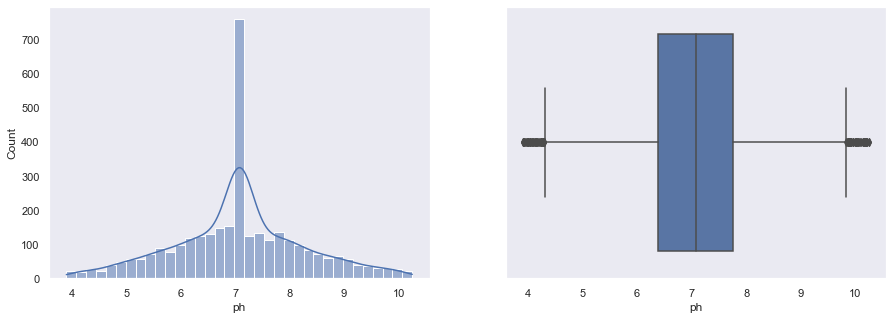

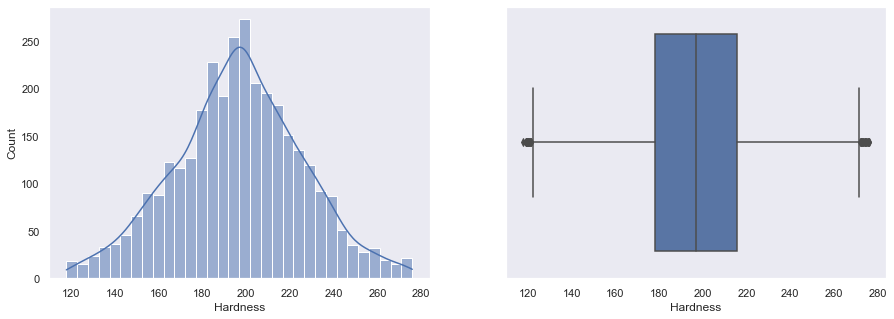

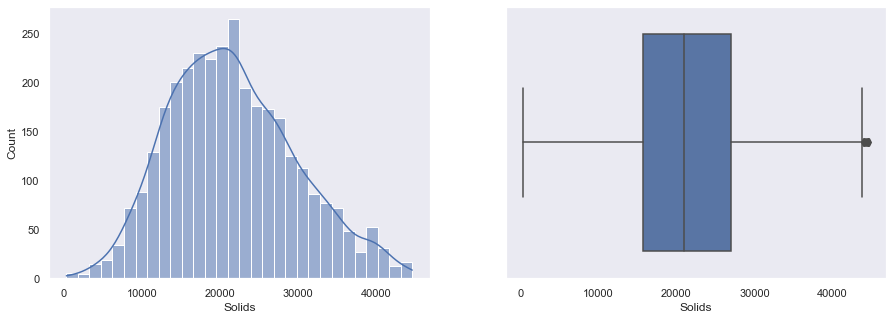

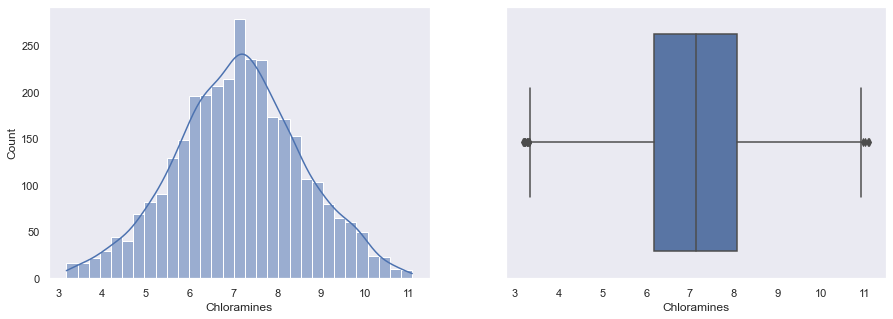

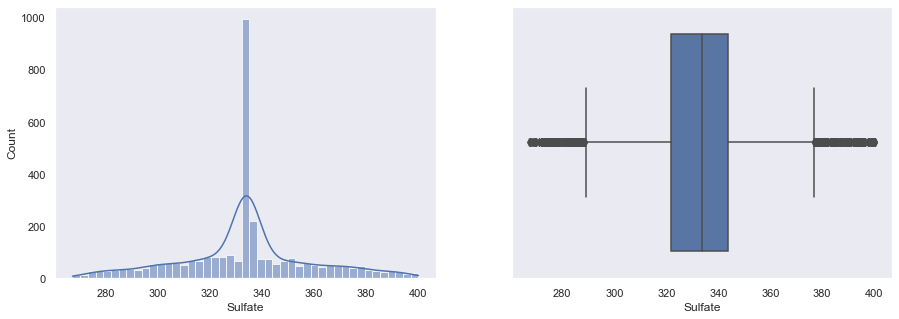

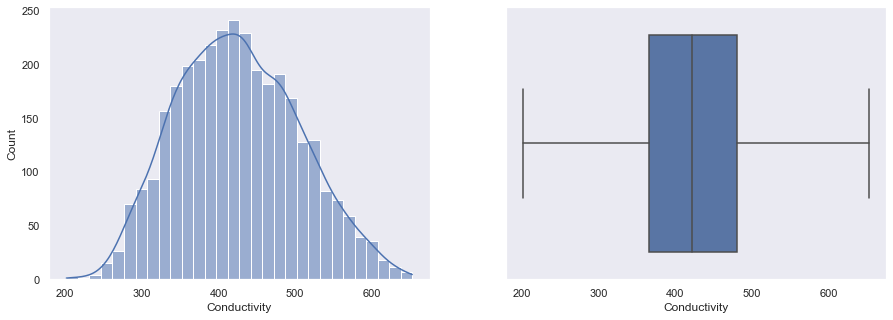

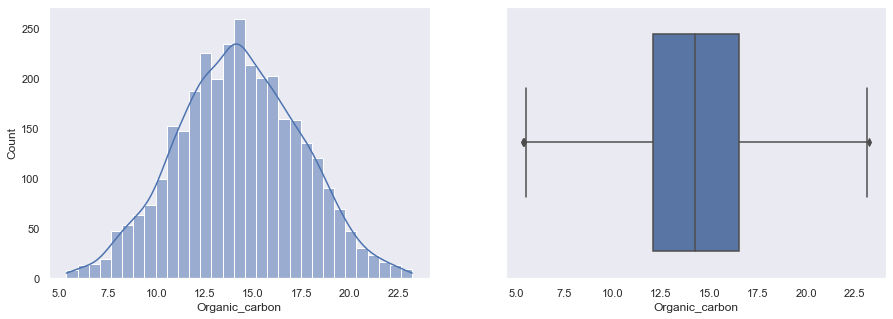

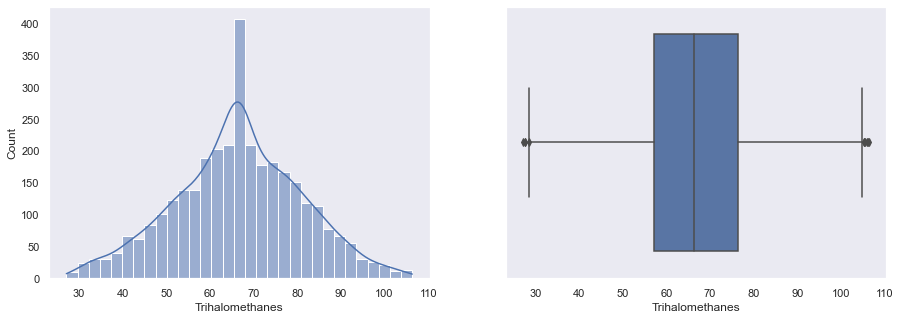

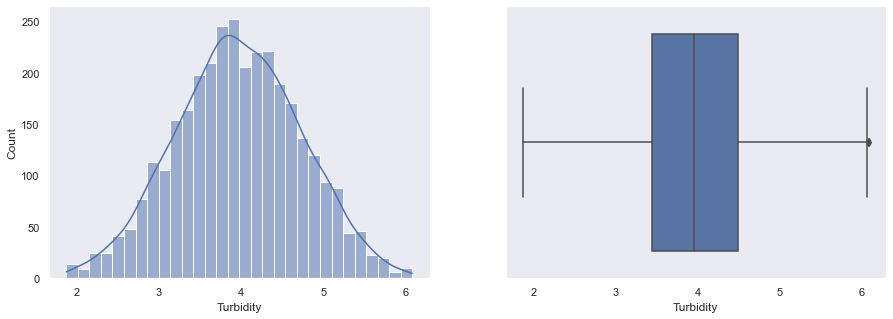

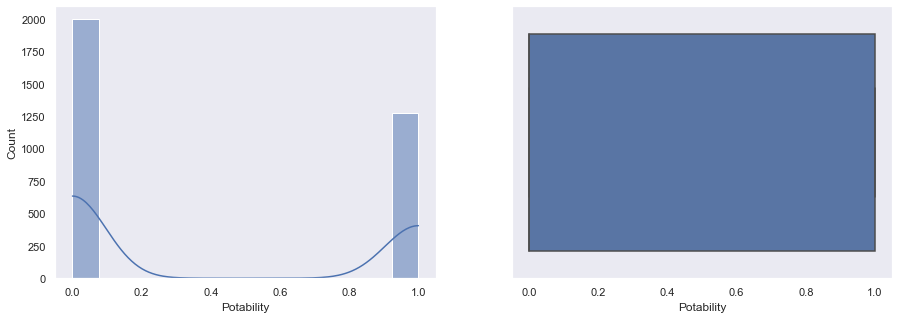

In [24]:
#lets recheck if outliers have been removed

# lets put this into a loop:
plt.figure(figsize=(18,24))
sns.set_style('dark')
i = 1
for col in df.columns:
    fig, axes = plt.subplots(1,2)
    sns.boxplot(x=df[col])
    sns.histplot(x = df[col], kde = True, ax = axes[0])

    i+=1

In [25]:
# general statistics for our columns/features after inputation and outlier removal:
df.describe().transpose()

count          mean          std         min           25%  \
ph               3276.0      7.074315     1.212530    3.902476      6.376857   
Hardness         3276.0    196.518697    29.401877  117.791230    178.222090   
Solids           3276.0  21629.750926  8137.573905  320.942611  15666.690297   
Chloramines      3276.0      7.123431     1.445700    3.181183      6.179765   
Sulfate          3276.0    333.813477    25.541204  267.202392    321.856816   
Conductivity     3276.0    425.500720    79.449495  201.619737    365.811312   
Organic_carbon   3276.0     14.286139     3.193340    5.362371     12.094010   
Trihalomethanes  3276.0     66.468165    14.609623   27.095703     57.201524   
Turbidity        3276.0      3.967260     0.759414    1.872573      3.444882   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.080795      7.762369     10.252816  
Hardness           196.967627    215.593162    275.886513  
Solids           20927.833607  26957.576932  44652.363872  
Chloramines          7.130299      8.076082     11.086526  
Sulfate            333.775777    343.827461    400.274579  
Conductivity       421.926811    480.855683    652.537592  
Organic_carbon      14.246387     16.517104     23.234326  
Trihalomethanes     66.396293     76.336831    106.371720  
Turbidity            3.959577      4.494481      6.083772  
Potability           0.000000      1.000000      1.000000

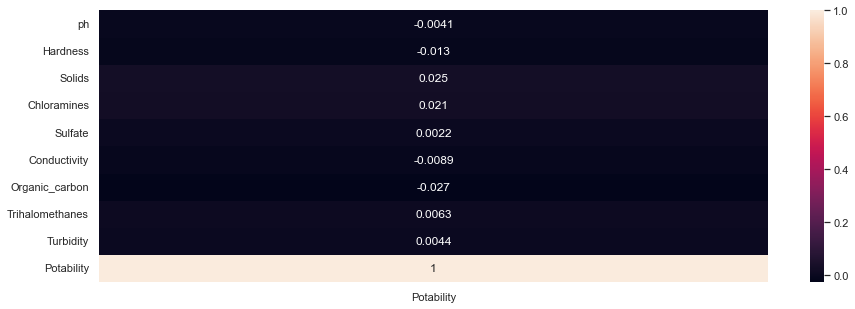

In [26]:
import seaborn as sns
#plt.figure(figsize=(7,5))
sns.heatmap(df.corr()[['Potability']], annot=True)
plt.show()

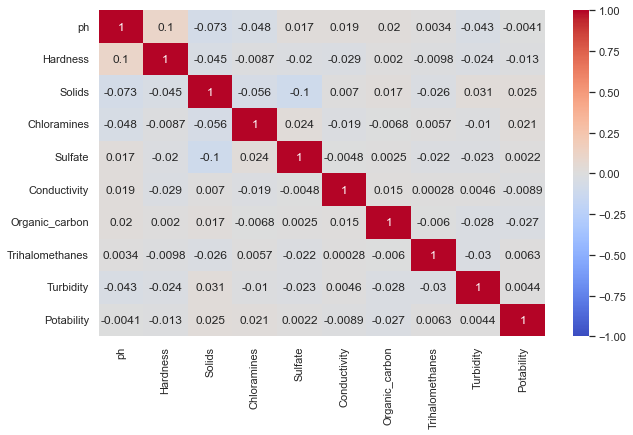

In [27]:
# correlation matrix and heatmap for feature selection
corr=df.corr()
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap="coolwarm")

In [28]:
print("Most positively correlated features with the target variable: Potability")
corr.sort_values(['Potability'], ascending=False, inplace=True)
corr.Potability

Most positively correlated features with the target variable: Potability


Potability         1.000000
Solids             0.025442
Chloramines        0.021136
Trihalomethanes    0.006346
Turbidity          0.004444
Sulfate            0.002171
ph                -0.004099
Conductivity      -0.008891
Hardness          -0.012713
Organic_carbon    -0.027319
Name: Potability, dtype: float64

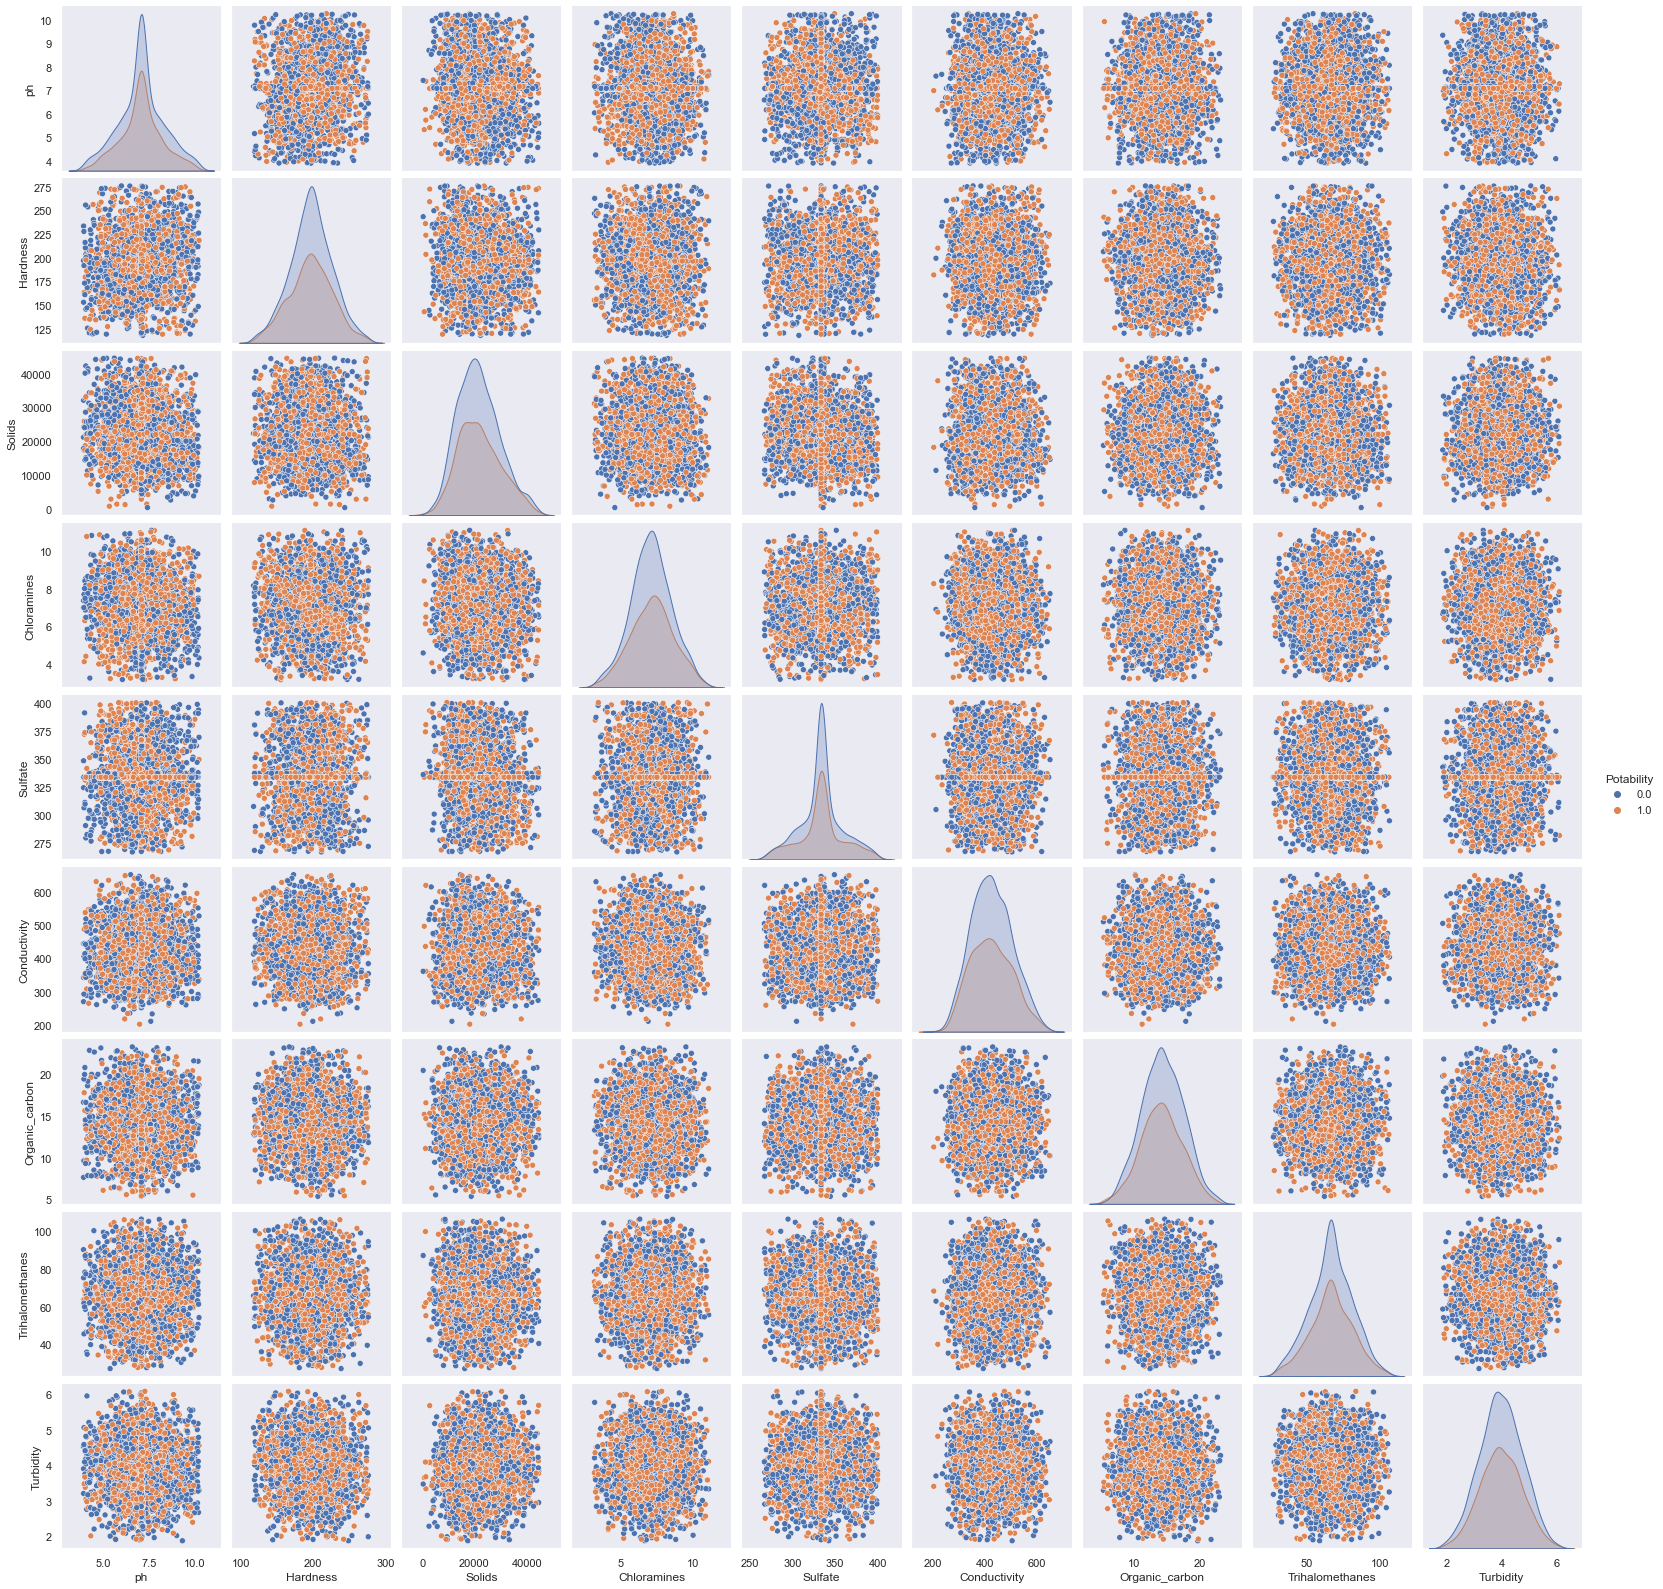

In [29]:
# MULTIVARIATE

# Pairplot
sns.pairplot(df, hue = 'Potability')

In [30]:
# DEFINE VARIABLES & TARGET

X=df.drop("Potability",axis=1).values
y=df["Potability"].values

In [31]:
print(X)
print(y)

[[7.08079450e+00 2.04890455e+02 2.07913190e+04 ... 1.03797831e+01
  8.69909705e+01 2.96313538e+00]
 [7.08079450e+00 1.29422921e+02 1.86300579e+04 ... 1.51800131e+01
  5.63290763e+01 4.50065627e+00]
 [8.09912419e+00 2.24236259e+02 1.99095417e+04 ... 1.68686369e+01
  6.64200925e+01 3.05593375e+00]
 ...
 [9.41951032e+00 1.75762646e+02 3.31555782e+04 ... 1.10390697e+01
  6.98454003e+01 3.29887550e+00]
 [5.12676292e+00 2.30603758e+02 1.19838694e+04 ... 1.11689462e+01
  7.74882131e+01 4.70865847e+00]
 [7.87467136e+00 1.95102299e+02 1.74041771e+04 ... 1.61403676e+01
  7.86984463e+01 2.30914906e+00]]
[0. 0. 0. ... 1. 1. 1.]


In [32]:
print(X[:,1])

[204.89045547 129.42292051 224.23625939 ... 175.7626463  230.60375751
 195.10229859]


X_train (2620, 9)
X_test (656, 9)
y_train (2620,)
y_test (656,)


<AxesSubplot:ylabel='Count'>

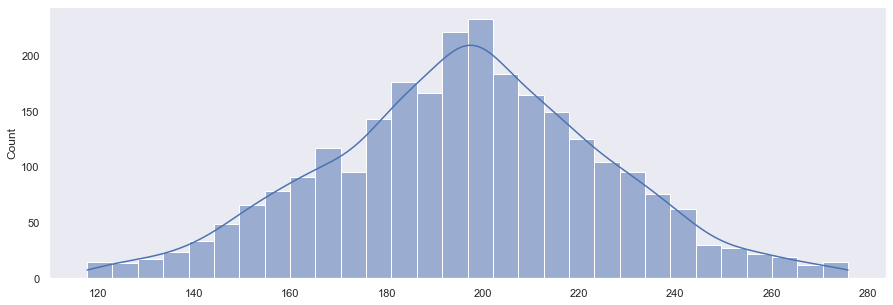

In [33]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

# plot 1 variable: 1st which is 'ph' (all rows, first column)
sns.histplot(x = X_train[:,1], kde = True)

In [34]:
print(X_train)

[[5.79115437e+00 1.90431679e+02 2.02882356e+04 ... 1.77068383e+01
  8.43881914e+01 4.10483482e+00]
 [7.08079450e+00 1.87043283e+02 2.46345524e+04 ... 1.10539246e+01
  7.41081803e+01 3.49871682e+00]
 [8.39724810e+00 1.99495811e+02 1.67722262e+04 ... 1.72360472e+01
  7.58535486e+01 2.83579428e+00]
 ...
 [7.38010483e+00 2.37922637e+02 1.68625435e+04 ... 1.32544754e+01
  9.28645571e+01 5.03045220e+00]
 [8.03105522e+00 2.22628424e+02 1.81348350e+04 ... 1.20659628e+01
  7.85497122e+01 3.33888013e+00]
 [6.20357285e+00 1.39129083e+02 6.69823910e+03 ... 1.33681645e+01
  6.82986891e+01 4.30554936e+00]]


X_train (2620, 9)
X_test (656, 9)
y_train (2620,)
y_test (656,)


<AxesSubplot:ylabel='Count'>

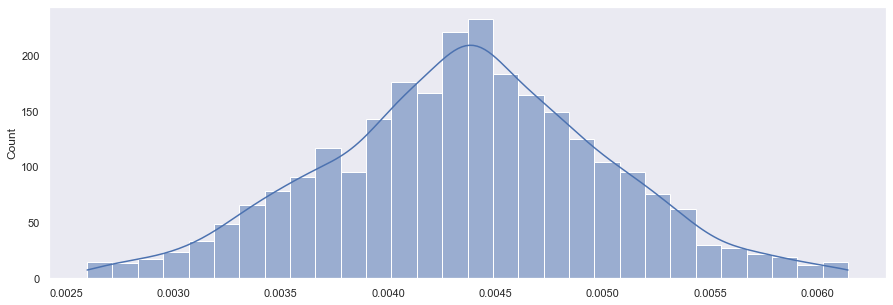

In [35]:
# min-max normalization
x_train_max = np.max(X_train)
x_train_min = np.min(X_train)
X_train = (X_train - x_train_min)/(x_train_max-x_train_min)
X_test = (X_test - x_train_min)/(x_train_max-x_train_min)

print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

# plot 1 variable: 1st which is 'ph' (all rows, first column)
sns.histplot(x = X_train[:,1], kde = True)

In [36]:
print(X_train)

[[8.78391522e-05 4.22675167e-03 4.54740268e-01 ... 3.54941801e-04
  1.84967481e-03 5.00385170e-05]
 [1.16747799e-04 4.15079720e-03 5.52167555e-01 ... 2.05809709e-04
  1.61923750e-03 3.64517414e-05]
 [1.46257498e-04 4.42993377e-03 3.75925203e-01 ... 3.44388521e-04
  1.65836177e-03 2.15916321e-05]
 ...
 [1.23457156e-04 5.29131169e-03 3.77949759e-01 ... 2.55137381e-04
  2.03968151e-03 7.07872090e-05]
 [1.38048897e-04 4.94847575e-03 4.06469519e-01 ... 2.28495615e-04
  1.71879913e-03 3.28688330e-05]
 [9.70839482e-05 3.07674976e-03 1.50106133e-01 ... 2.57685844e-04
  1.48901161e-03 5.45377457e-05]]


In [37]:
model = RandomForestClassifier (bootstrap =True,
 max_depth = 2,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split = 2,
 n_estimators =10)

# train model with data
model.fit(X_train,y_train.ravel())

RandomForestClassifier(max_depth=2, n_estimators=10)

In [38]:
# make predictions
y_pred = model.predict(X_test)
df2 = pd.DataFrame(y_pred, columns = ['y-pred'])
vertical_concat = pd.concat([df2, pd.DataFrame(y_test,columns=['label'])], axis = 1 )
vertical_concat.head(10)

y-pred  label
0     0.0    1.0
1     0.0    1.0
2     0.0    1.0
3     0.0    0.0
4     0.0    0.0
5     0.0    0.0
6     0.0    1.0
7     0.0    0.0
8     0.0    1.0
9     0.0    0.0

In [39]:
# comfusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[397   0]
 [259   0]]


In [40]:
# accuracy 
score = model.score(X_test, y_test)
print(score*100,'%')

60.518292682926834 %


In [41]:
print (f'Train Accuracy - : {model.score(X_train,y_train)*100:.3f} %')
print (f'Test Accuracy - : {model.score(X_test,y_test)*100:.3f} %')

Train Accuracy - : 61.260 %
Test Accuracy - : 60.518 %


In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2s= r2_score(y_test, y_pred)
print(f' mse = {mse}, mae = {mae}, r2s={r2s}')


 mse = 0.3948170731707317, mae = 0.3948170731707317, r2s=-0.6523929471032746


In [44]:
import pickle
# Open a file and use dump() 
with open('water_quality.pkl', 'wb') as file: 
      
    # A new file will be created 
    pickle.dump(model, file)